In [1]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MinuteLocator, SecondLocator
import numpy as np
# from StringIO import StringIO
import datetime as dt
import yaml, glob

In [36]:

def parse_ivals(log: str):
    print(log)
    # files = glob.glob(log)
    # if len(files) == 0: return None
    with open(log, 'r') as f:
        yaml_src, recording, parsing_finished = "", False, False
        for line in f:
            if line.startswith('===== GC Intervals Start ====='):
                recording = True
            elif line.startswith('===== GC Intervals End ====='):
                recording = False
                parsing_finished = True
            elif recording:
                yaml_src += line
        return yaml.safe_load(yaml_src) if parsing_finished else None

def calculate_work_ivals(stw_ivals, work_ivals):
    ivals = []
    for [x1, x2] in work_ivals:
        overlap = False
        for [y1, y2] in stw_ivals:
            if x1 <= y2 and y1 <= x2:
                overlap = True
                break
        if overlap:
            ivals.append([x1, x2])
    print(ivals)
    starts = [float(x[0]) / 1000.0 for x in ivals]
    stops = [float(x[1]) / 1000.0 for x in ivals]
    return starts, stops

def plot_timeline(log: str, pauses=None, skip=0):
    data = parse_ivals(log)
    if data is None: return
    if len(data['stw-tracing']) <= 0: return
    plt.figure(figsize=(20,6))
    stw = data['stw-tracing']
    if pauses is None: pauses = len(stw)
    stw = stw[skip : skip+pauses]
    data['stw-tracing'] = stw
    n = len(data['busy'])
    # plot work ivals
    print(data['stw-tracing'])
    for i in range(n):
        starts, stops = calculate_work_ivals(data['stw-tracing'], data['busy'][i])
        y = np.ones(len(starts)) * i
        # timelines(y, starts, stops, 'k')
        plt.hlines(y, starts, stops, 'k', lw=4)
    # plot stw phases
    for [start, stop] in data['stw-tracing']:
        plt.vlines([start/1000.0], [-0.5], [n+0.5], 'r', lw=1)
        plt.vlines([stop/1000.0], [-0.5], [n+0.5], 'b', lw=1)

Immix, 3x heap

/home/wenyuz/MMTk-Dev/x.log
[[41556724, 41576910]]
[[41556775, 41576519], [41576540, 41576547], [41576574, 41576613], [41576619, 41576657], [41576674, 41576675], [41576683, 41576684], [41576732, 41576738], [41576747, 41576793], [41576809, 41576810], [41576820, 41576821], [41576844, 41576857], [41576873, 41576874], [41576896, 41576898]]
[[41556748, 41576487], [41576504, 41576520], [41576537, 41576538], [41576545, 41576551], [41576553, 41576554], [41576581, 41576671], [41576692, 41576693], [41576713, 41576735], [41576750, 41576847], [41576873, 41576876]]
[[41556742, 41576510], [41576517, 41576519], [41576540, 41576541], [41576556, 41576558], [41576574, 41576575], [41576591, 41576593], [41576610, 41576611], [41576617, 41576674], [41576683, 41576684], [41576717, 41576718], [41576740, 41576744], [41576755, 41576756], [41576788, 41576789], [41576821, 41576823], [41576832, 41576833], [41576856, 41576863]]
[[41556759, 41576555], [41576599, 41576600], [41576612, 41576613], [41576623, 41576624],

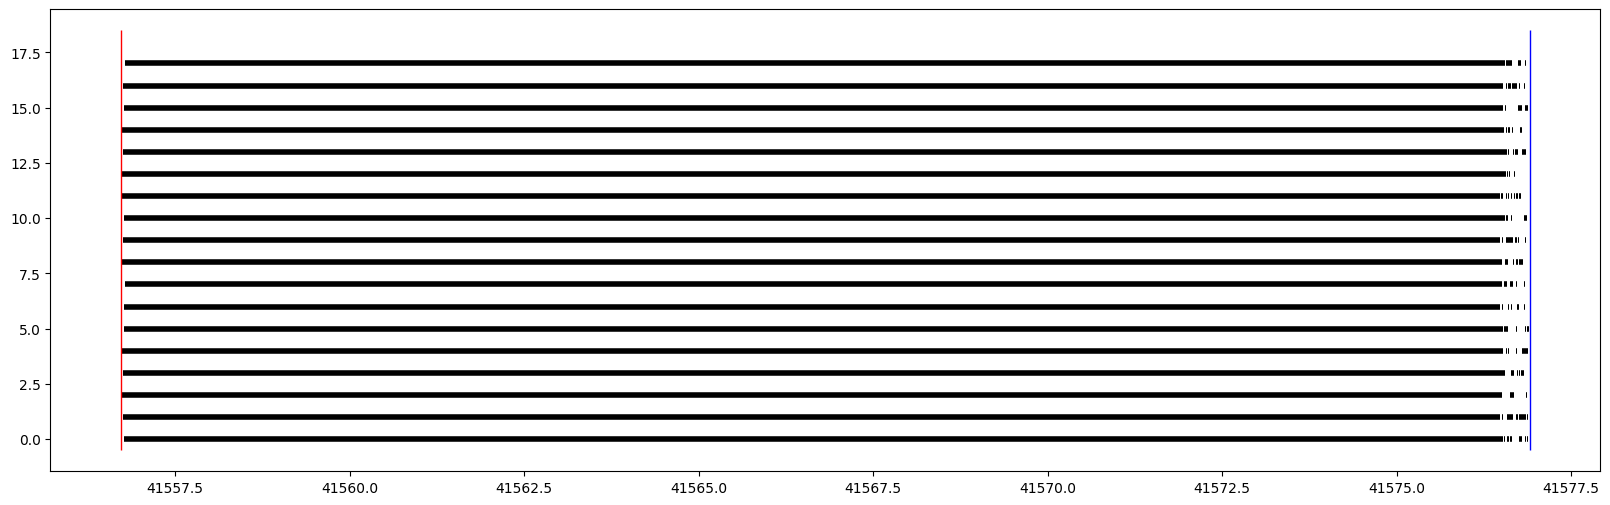

In [43]:
plot_timeline("/home/wenyuz/MMTk-Dev/x.log", pauses=1, skip=1)

/home/wenyuz/MMTk-Dev/y.log
[[42073727, 42093879]]
[[42073759, 42093395], [42093419, 42093450], [42093466, 42093471], [42093487, 42093506], [42093516, 42093823], [42093854, 42093854]]
[[42073763, 42093287], [42093298, 42093303], [42093341, 42093413], [42093453, 42093491], [42093522, 42093683], [42093699, 42093721], [42093771, 42093796], [42093806, 42093821], [42093853, 42093853]]
[[42073782, 42093378], [42093389, 42093395], [42093437, 42093500], [42093564, 42093799], [42093841, 42093847]]
[[42073747, 42093505], [42093533, 42093847], [42093860, 42093861]]
[[42073764, 42093395], [42093410, 42093411], [42093424, 42093477], [42093490, 42093611], [42093616, 42093617], [42093619, 42093836], [42093841, 42093845]]
[[42073745, 42093731], [42093744, 42093816], [42093825, 42093826], [42093843, 42093844], [42093861, 42093862]]
[[42073771, 42093827], [42093838, 42093852], [42093866, 42093867]]
[[42073746, 42093378], [42093401, 42093476], [42093497, 42093507], [42093517, 42093518], [42093524, 420937

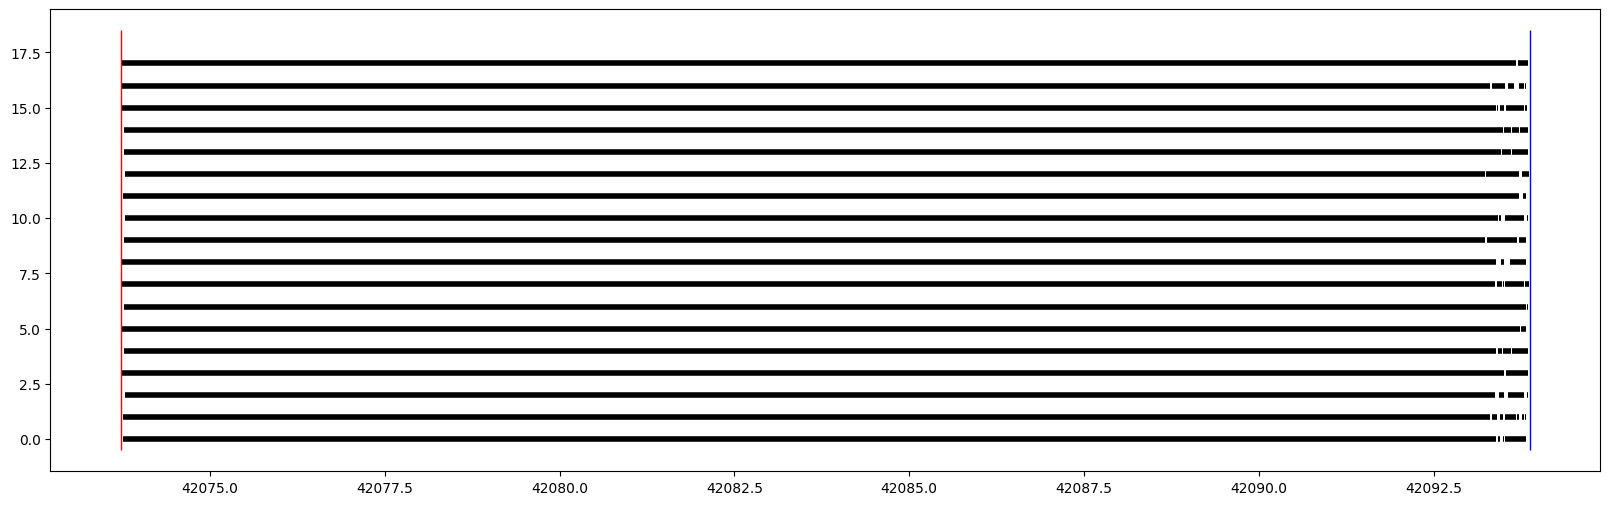

In [42]:
plot_timeline("/home/wenyuz/MMTk-Dev/y.log", pauses=1, skip=1)